# Kernel Density Estimation {#sec-kde}

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from scipy.constants import golden
import arviz as az

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

Consideriamo in maggiore dettaglio la procedura di costruzione di un Kernel Density plot. 

Un istogramma divide i dati in intervalli discreti, conta il numero di punti che rientrano in ciascun intervallo e visualizza i risultati in un modo intuitivo. Nell'istruzione seguente, se specifichiamo il parametro `density=True`, l'area totale delle barre dell'istogramma diventa uguale a 1.

Per fare un esempio, definisco una funzione che simula dei dati estratti da una distribuzione bimodale.

In [3]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N) :] += 5
    return x

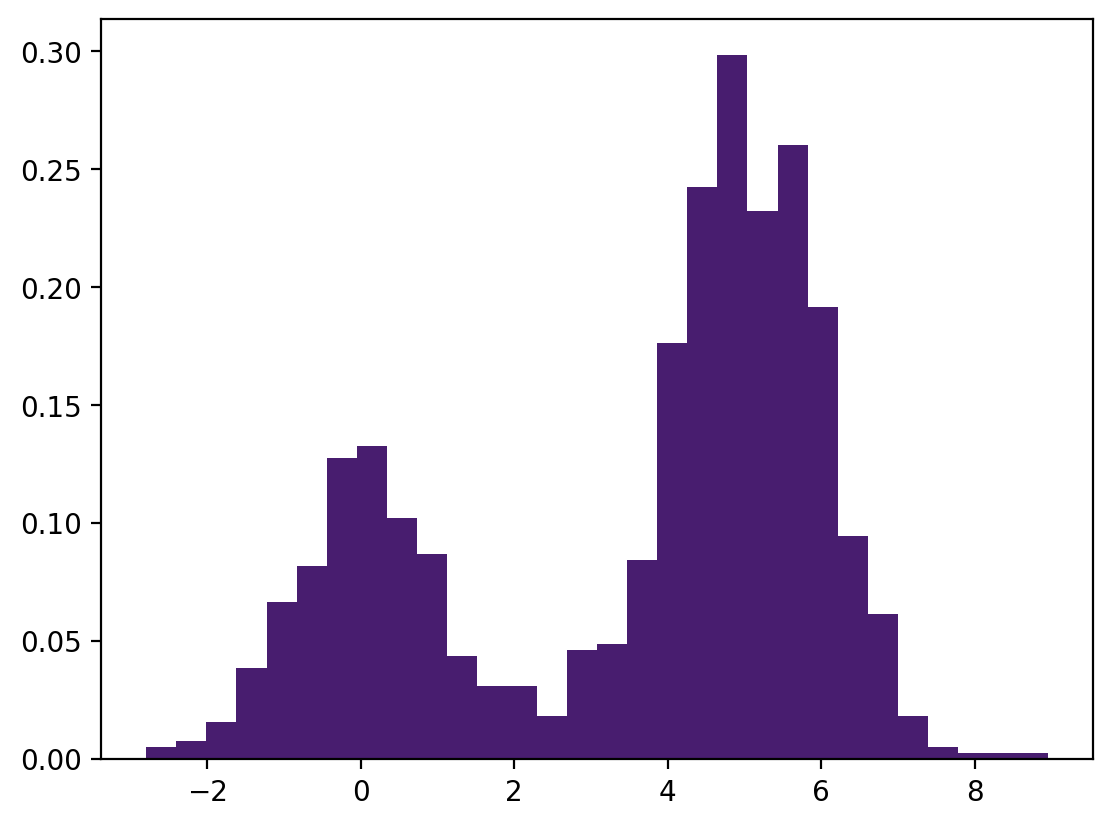

In [4]:
x = make_data(1000)
hist = plt.hist(x, bins=30, density=True)

Genero ora un numero più piccolo di dati.

In [5]:
x = make_data(20, f=0.3, rseed=10)
x

array([ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597,
       -0.72008556,  5.26551159,  5.10854853,  5.00429143,  4.82539979,
        5.43302619,  6.20303737,  4.03493433,  6.02827408,  5.22863013,
        5.44513761,  3.86339779,  5.13513688,  6.484537  ,  3.92019511])

Il primo dei due istrogrammi seguenti chiarisce che si tratta di una distribuzione bimodale. Quello successivo, invece, mostra una distribuzione unimodale con una lunga coda. Senza vedere il codice, probabilmente non ci verrebbe in mente che questi due istogrammi sono stati costruiti dagli stessi dati. Il problema degli istogrammi, infatti, è che, a seconda della scelta dell'ampiezza degli intervalli, il profilo dell'istogramma può  cambiare anche in maniera drastica. La domanda è: come possiamo ottenere un risultato migliore?

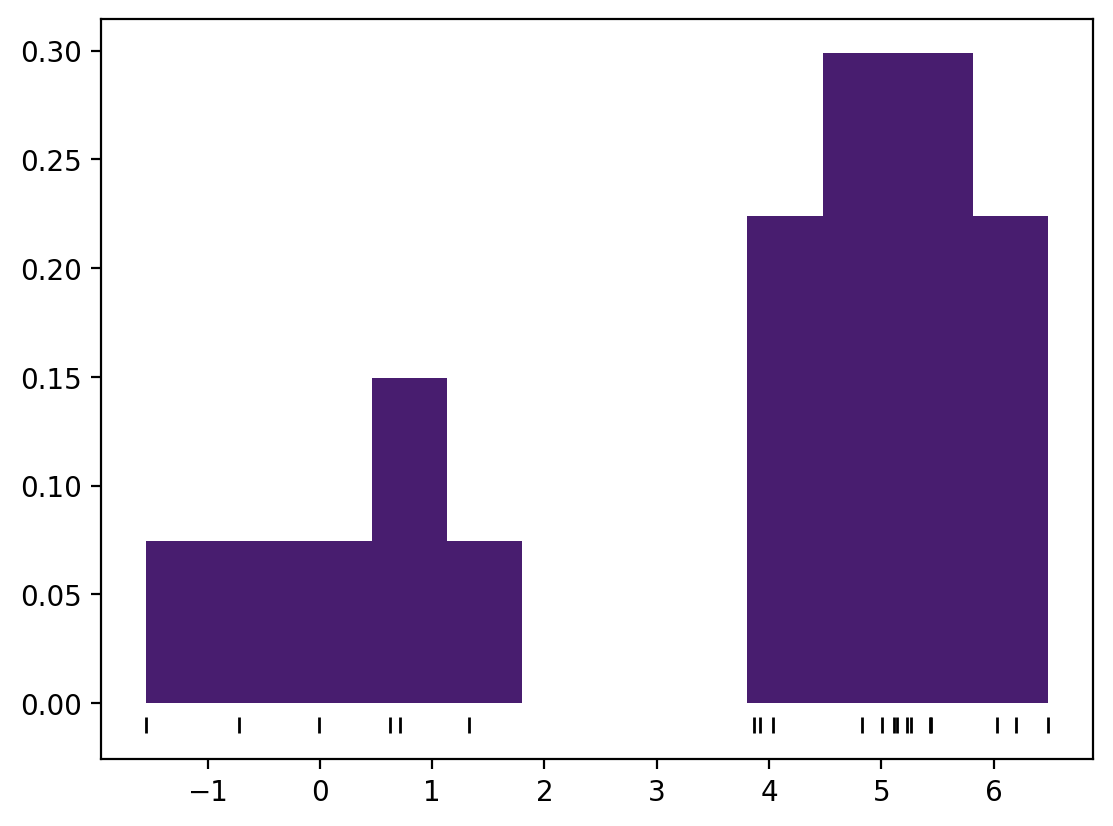

In [7]:
hist = plt.hist(x, bins=12, density=True)
plt.plot(x, np.full_like(x, -0.01), "|k", markeredgewidth=1);

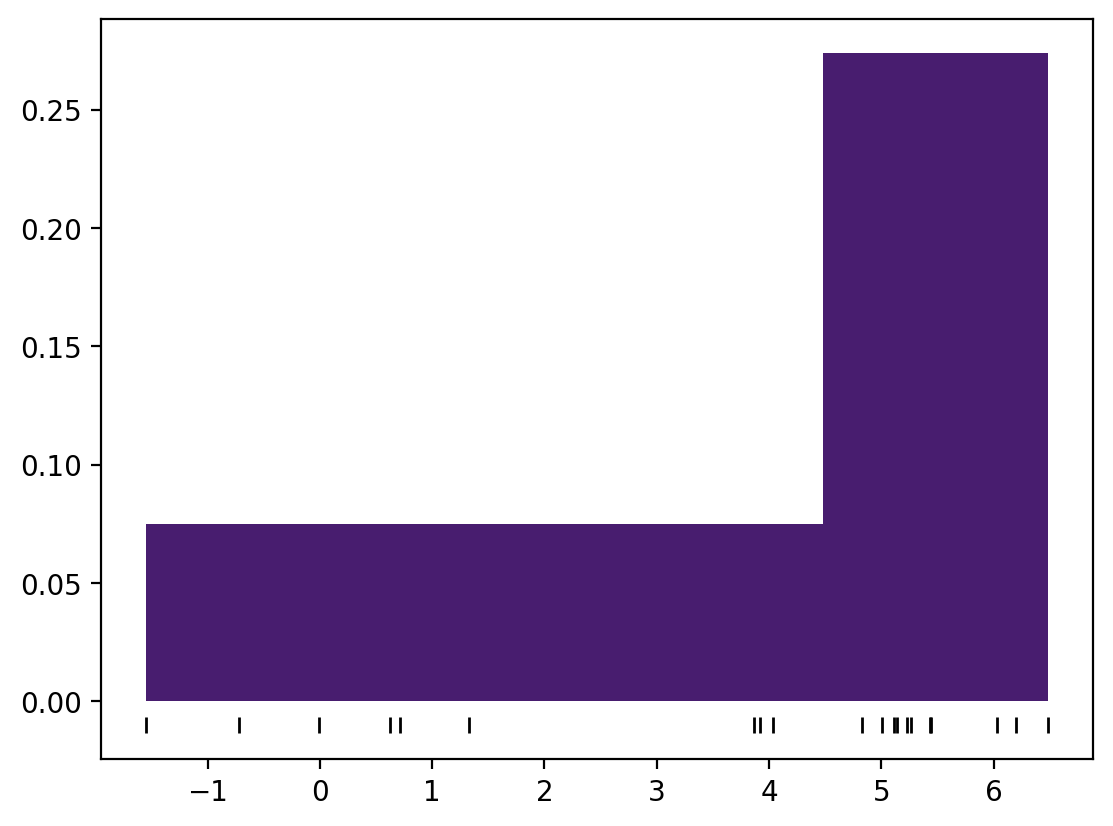

In [8]:
hist = plt.hist(x, bins=4, density=True)
plt.plot(x, np.full_like(x, -0.01), "|k", markeredgewidth=1);

L'istogramma conta quante osservazioni sono contenute in ciascun intervallo. Il Kernel Density Plot (KDE) fa una cosa simile, ma sostituisce alle frequenze assolute (o relative) un metodo diverso. Immaginiamo di posizionare la curva densità di una distribuzione gaussiana (con un'opportuna deviazione standard) in corrispondenza di ciascun punto della distribuzione. I punti sono rappresentati, nelle figure precedenti dai "ticks" evidenziati sotto l'istogramma. Per ciascun valore dell'asse $X$, le ordinate di queste funzioni di densità vengono sommate. I punti così ottenuti sono congiunti da una curva. Il processo è descritto nella cella seguente.

In [9]:
x_d = np.linspace(-4, 8, 1000)
density = sum(st.norm(xi).pdf(x_d) for xi in x)
density[0:10]

array([0.02160887, 0.02227584, 0.02296033, 0.02366267, 0.02438324,
       0.02512238, 0.02588048, 0.02665789, 0.02745499, 0.02827215])

Il risultato è il cosiddetto KDE plot, ovvero un istogramma "lisciato".

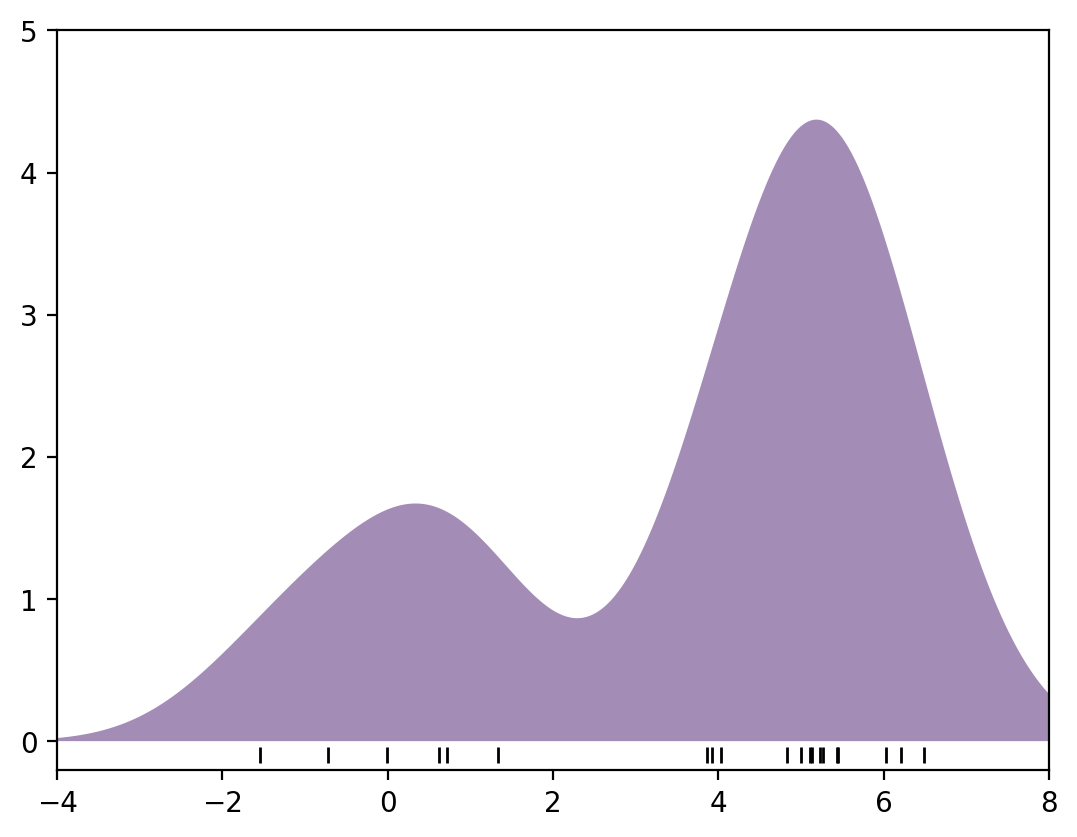

In [11]:
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), "|k", markeredgewidth=1)

plt.axis([-4, 8, -0.2, 5]);

Un risultato equivalente si ottiene con la funzione `kdeplot()` di `seaborn`. Si noti l'argomento `bw_adjust` che determina la deviazione standard delle gaussiane che vengono sommate.

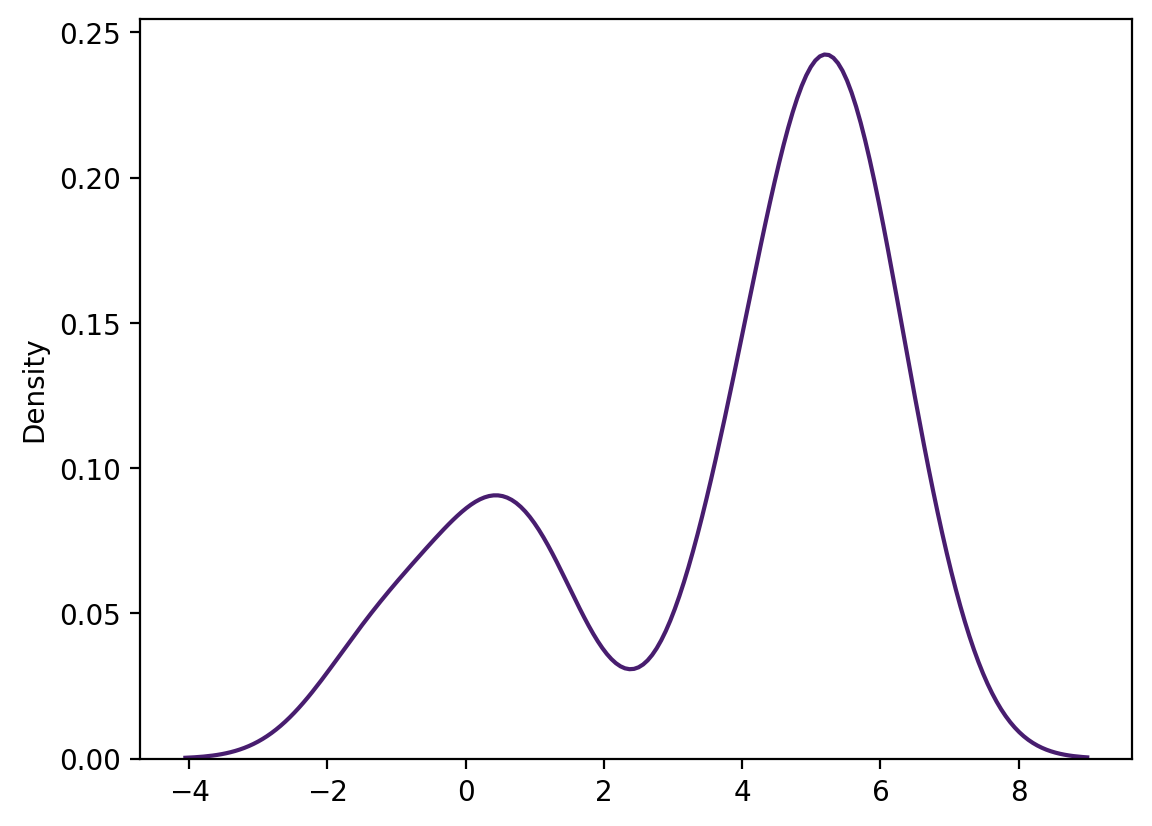

In [12]:
_ = sns.kdeplot(x, bw_adjust=0.6);

In generale, questo tipo di rappresentazione di una distribuzione empirica di frequenza è più informativa di un istogramma.